#  Task assignment for data scientist intern 
## DS5: Explain how a ROC curve works?

##  Brief Answer: In a nutshell The ROC curve is a graphical plot that illustrates the performance of any binary classifier system based on threshold.In other words simply it is a plot of Sensitivity(TPR) vs 1-Specificty(FPR). 


          Note: For better illustration I used  images from internet in this notebook.

## ROC(Receiver Operator Characteristic)

classification algorithms work on the concept of probabilit. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome.

Now, the question is, what should be an ideal threshold?


The following diagram shows a typical logistic regression curve.
<img src="logisticRegression.PNG" width="300">

The horizontal lines represent the various values of thresholds ranging from 0 to 1.
Let’s suppose our classification problem was to identify the obese people from the given data.
The green markers represent obese people and the red markers represent the non-obese people.
Our confusion matrix will depend on the value of the threshold chosen by us.
For Example, if 0.25 is the threshold then

      TP(actually obese)=3
  
      TN(Not obese)=2
  
      FP(Not obese but predicted obese)=2(the two red squares above the 0.25 line)
  
      FN(Obese but predicted as not obese )=1(Green circle below 0.25line  )

A typical ROC curve looks like the following figure.
<img src="ROC.PNG" width="300">

* Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
* The green dotted line represents the scenario when the true positive rate equals the false positive rate.
* As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
* After some time, the false positive rate becomes zero.
* The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
* But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
* The ROC curve answers our question of which threshold to choose.

## Python Implementation: 

## For Python Implementation I used diabetes dataset and run a logistic regression model on it. At the end of this notebook i plot the roc curve using fpr,tpr resulted from the prediction of logistic regression model. 

In [32]:
#importing Libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt



In [10]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [14]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [15]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [16]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [18]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = log_reg.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [30]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

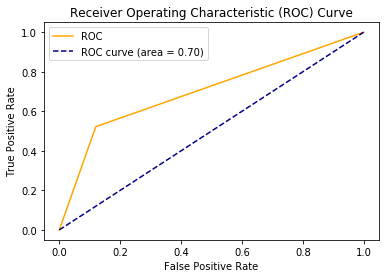

In [31]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()